# A/B Testing - Lab

## Introduction

In this lab, you'll go through a the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally, but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template to in order to detect a 1% performance increase (or decrease).


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [3]:
h_0 = "The new email template will spur less than or equal to sales as the current template"

In [ ]:
# FI: The response rate of the new email template will equal 0.05

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [4]:
h_1 = "The response rate of the new email template ≠ 0.05"

In [ ]:
# FI: The response rate if the new email template will be ≥ 0.06

In [ ]:
# type1 = we find that the response rate for our new template increases when in reality it does not
# type2 = we find that the response rate for our new template does not increase when in reality it does

## Step 3: Calculate n for standard alpha and power thresholds

Now define what alpha and beta you believe might be appropriate for this scenario.
To start, arbitrarily set alpha to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [1]:
from statsmodels.stats.power import TTestIndPower, TTestPower

In [16]:
alpha = 0.05
power = 0.8
std = 0.0475
effect = (0.06 - 0.05) / std
effect

0.2105263157894736

In [55]:
TTestIndPower().solve_power(effect_size=effect, power=power, alpha=alpha, alternative='larger')

279.666746802197

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, its worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

In [45]:
#Your code; plot power curves for the various alpha and effect size combinations
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [29]:
alpha2 = np.array([.01, .05, .1])
effect2 = np.array([(.005/std),effect,(.02/std),(.03/std)])
effect2

array([0.10526316, 0.21052632, 0.42105263, 0.63157895])

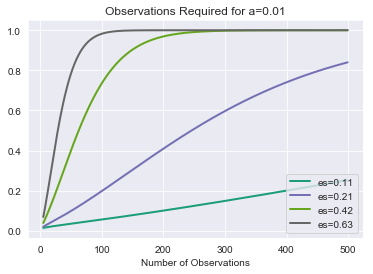

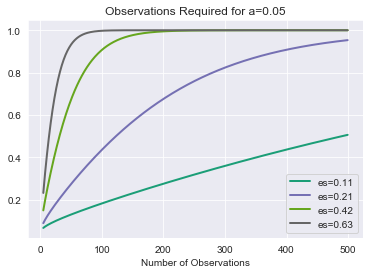

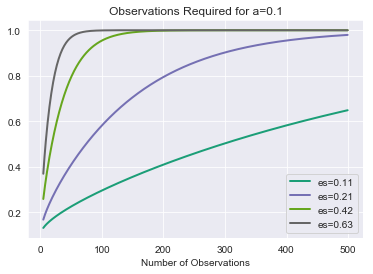

In [56]:
TTestIndPower().plot_power(effect_size=effect2, alpha =.01, dep_var="nobs", nobs = np.array(range(5,500)), 
                          title="Observations Required for a=0.01", alternative='larger')

TTestIndPower().plot_power(effect_size=effect2, alpha =.05, dep_var="nobs", nobs = np.array(range(5,500)),
                          title="Observations Required for a=0.05", alternative='larger')

TTestIndPower().plot_power(effect_size=effect2, alpha =.1, dep_var="nobs", nobs = np.array(range(5,500)),
                          title="Observations Required for a=0.1", alternative='larger')

plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

At the lower end we reduce our Type I error by the highest margin, the consequences of which would be that we think that the new response rate has increased when it hasn't. <br>

On the other hand this raises the possiblity of a Type II error, which would be we don't think the new template is an improvement on the old one when in reality is is. <br>

I think the former would be the graver mistake becuase not only could it impact the bottom line, we wouldn't know it was happening. So we don't know how long it would take us to catch this error, and if we only saw the consequences but did not understand them, we may waste more resources investigating what went wrong.<br>

This rules out the last graph. The graphs we should decide between are the 1st and 2nd.<br>

Graph 1 we have the smallest margin of error, but it would require 450 observations, whereas in the second our potential for error is increase by 4% but our observation requirements drop to 280.
I would recommend the latter because of the still-strong risk aversion and the significant decrease of necessary observations.

#### Flatiron Answer

Answers will vary. It seems that a minimum sample size 100, 
to detect all but the largest effect sizes with a reasonable balance of alpha and power. 
After the initial roll-out, there should be sufficient evidence to determine whether 
further investigation is warranted.

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.